<a href="https://colab.research.google.com/github/mhaidar10/machine-leaning-pemula-dc/blob/main/03_Dasar_Dasar_Machine_Learning/01_Latihan_SKLearn_dengan_Teknik_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tujuan**

menggunakan grid search untuk mencari parameter terbaik pada sebuah model SVR. Dataset yang digunakan yaitu dataset gaji.Tujuan utama adalah menggunakan grid search untuk mencari parameter yang lebih baik bagi model

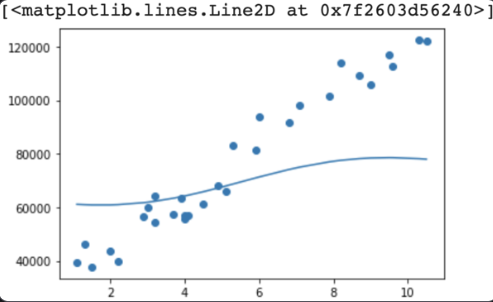

dataset link url : https://www.kaggle.com/code/vivinbarath/simple-linear-regression-for-salary-data/input

In [3]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = np.array(X)
X = X.reshape(-1,1)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [10]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [11]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

memvisualisasikan SVR dengan parameter hasil grid search. Dapat dilihat dari hasil plot bahwa grid search berhasil mencari parameter yang lebih baik sehingga meningkatkan performa dari model.

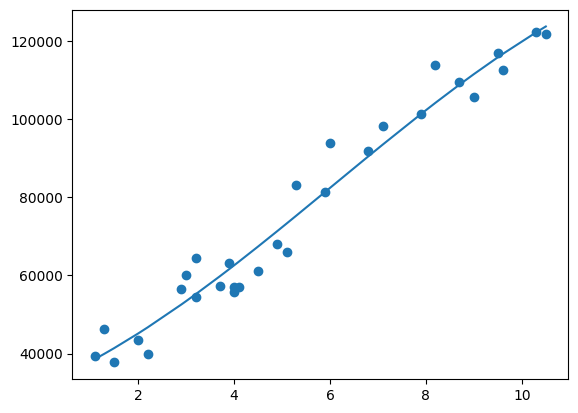

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))